In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
import cvxpy as cp
from tqdm import tqdm

from src.OnlineRegressors.ConcreteRegressors.AdaptiveRegression import AdaptiveRegressor
from src.OnlineRegressors.ConcreteRegressors.RidgeRegression import OnlineRidge

In [37]:
def dantzig_selector(d, X, Y, sigma):
    lam_p = np.sqrt(2 * np.log(d))

    w = cp.Variable((d, 1))
    constraints = [X.T @ (Y - X @ w) <= lam_p * sigma * np.ones((d, 1)),
                   X.T @ (Y - X @ w) >= -lam_p * sigma * np.ones((d, 1))]
    obj = cp.Minimize(cp.norm(w, 1))
    prob = cp.Problem(obj, constraints)
    prob.solve(verbose=False)
    return w.value

In [52]:
d = 100
n = 50
density = 0.1
var = 1

X = np.random.normal(0, 5, size=(n, d))
w_star = sp.random(d, 1, density=density)
noises = np.random.normal(0, var, size=(n, 1))
y = X @ w_star
y_noisy = y + noises

3.27849028087804


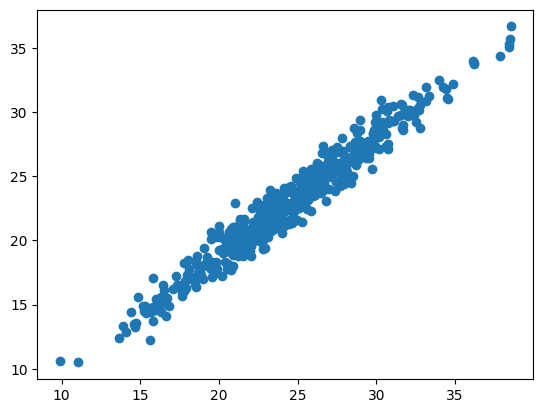

In [58]:
w_pred = dantzig_selector(d, X, y_noisy, var)

test = 500
X_test = np.random.rand(test, d) * 10
# X_test = X 
y_real = X_test @ w_star
y_pred = X_test @ w_pred 

mse = (1/test) * np.sum((y_real - y_pred) ** 2)
print(mse)

plt.scatter(y_real, y_pred)
plt.show()

In [4]:
d = 100
n = 200
density = 0.1
var = 1

X = np.random.normal(0, 1, size=(n, d))
w_star = sp.random(d, 1, density=density)
noises = np.random.normal(0, var, size=(n, 1))
y = X @ w_star
y_noisy = y + noises

w_star = sp.random(d, 1, density=density)
# w_star /= sp.linalg.norm(w_star, 1)
eps=0.2
k=density * d
# n = int((1 / (eps * eps)) * k * np.log(eps * d / k)) + 2
# n *= 2
# n=10
# print(n)
t0 = k * np.log(d) * np.log(n)
params = {"sigma": var,
          "k": int(density * d),
          "k0": int(density * d),
          "t0": t0
    }



In [10]:
w_norm = sp.linalg.norm(w_star)
rhs = (1 - eps) * w_norm
lhs = (1 + eps) * w_norm

mid = 1 / (np.sqrt(int((1 / (eps * eps)) * k * np.log(eps * d / k)))) * np.linalg.norm(X @ w_star)

if rhs <= mid <= lhs:
    print("GOOD")
else:
    print("BAD")

GOOD


100%|██████████| 200/200 [00:00<00:00, 6073.95it/s]


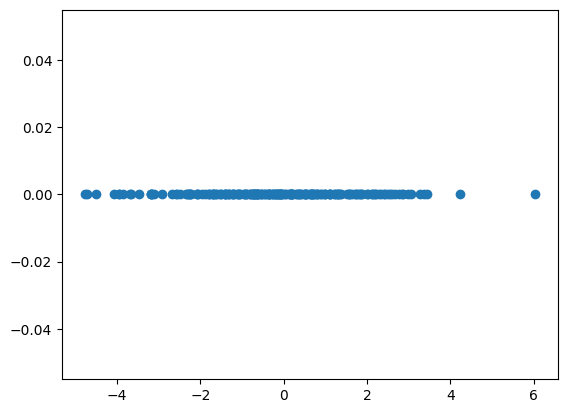

In [9]:
reg1 = AdaptiveRegressor(d, params)

y_pred = np.zeros(n)
for i in tqdm(range(n)):
    pred = reg1.predict_and_fit(X[i], y_noisy[i][0])
    y_pred[i] = pred 

plt.scatter(y, y_pred)
plt.show()

In [8]:
reg1 = OnlineRidge(d)

y_pred = np.zeros(n)
for i in tqdm(range(n)):
    pred = reg1.predict_and_fit(X[i], y_noisy[i][0])
    y_pred[i] = pred 

plt.scatter(y, y_pred)
plt.show()

  0%|          | 0/200 [00:00<?, ?it/s]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 100)